# Median for O(n)

In [1]:
from random import randint
def ith_by_value(arr, i):
    """Return ith element by value.
       
       Parameters:
           arr -- an arbitary list with numbers
           i -- integer from 0 to len(arr) - 1
       Returns:
           The ith element by value. For example,
           if i is 0, it will return min(arr), if i
           is len(arr) - 1, it will return max.
    """
    if len(arr) == 1:
        return arr[0]
    
    delimiter = arr[randint(0, len(arr) - 1)]

    less_els, greater_els  = [], []
    equal_delimiter = 0
    for number in arr:
        if number < delimiter:
            less_els.append(number)
        else:
            if number == delimiter:
                equal_delimiter += 1
            greater_els.append(number)

    if len(less_els) > i:
        return ith_by_value(less_els, i)

    if len(less_els) + equal_delimiter > i:
        return delimiter
    
    return ith_by_value(greater_els, i - len(less_els))


def median(arr):
    """Find the median of a list
       for O(n) operations on average.
       
       Parameters:
           arr -- an arbitary list with numbers.
       Returns:
           The the median of the list.
    """
    return ith_by_value(arr, int((len(arr) - 1) / 2))

# Testing

In [2]:
from tqdm import tqdm
print('### testing')
for _ in tqdm(range(100)):
    N = randint(0, 1000)
    arr = [0] * N
    for i in range(N):
        arr[i] = randint(-100, 100)
    if median(arr) != sorted(arr)[(len(arr) - 1) // 2]:
        print(arr)
        break

### testing


100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1602.61it/s]


# Verifying that the function takes O(n) operations on average

In [3]:
def ith_by_value_counting(arr, i):
    """Return ith element by value.
       
       Parameters:
           arr -- an arbitary list with numbers
           i -- integer from 0 to len(arr) - 1
       Returns:
           A tuple (i_th elem, operations):

           i_th elem:
           The ith element by value. For example,
           if i is 0, it will return min(arr), if i
           is len(arr) - 1, it will return max.
           
           operations:
           The number of operations (namely comparison
           of the elements of the list) that were made.
    """
    if len(arr) == 1:
        return (arr[0], 0)

    curr_opers = 0
    
    delimiter = arr[randint(0, len(arr) - 1)]

    less_els, greater_els  = [], []
    equal_delimiter = 0
    for number in arr:
        curr_opers += 1
        if number < delimiter:
            less_els.append(number)
        else:
            if number == delimiter:
                equal_delimiter += 1
            greater_els.append(number)

    if len(less_els) > i:
        element, add_opers = ith_by_value_counting(less_els, i)
        return (element, add_opers + curr_opers)

    if len(less_els) + equal_delimiter > i:
        return (delimiter, curr_opers)
    
    element, add_opers = ith_by_value_counting(greater_els,
                                              i - len(less_els))
    return (element, add_opers + curr_opers)


def median_counting(arr):
    """Find the median of a list
       for O(n) operations on average.

       Parameters:
           arr -- an arbitary list with numbers.
       Returns:
           The the median of the list.
    """
    return ith_by_value_counting(arr,
                                 (len(arr) - 1) // 2)

In [4]:
from tqdm import tqdm
from time import time
import numpy as np

print("### counting")

arr_per_len = 100
av_operations_used = []

lengths = [1000 * i for i in range(1, 15)]

for length in tqdm(lengths):
    total_operations = 0
    total_time = 0
    for _ in range(arr_per_len):

        beginning_time = time()
        
        arr = list(np.random.rand(length))
        
        begin_time = time()
        m, opers = median_counting(arr)
        total_time += (time() - begin_time) * 1e6
        total_operations += opers

    av_operations_used.append((length,
                               total_operations / arr_per_len,
                               total_time / arr_per_len))

### counting


100%|███████████████████████████████████████████| 14/14 [00:03<00:00,  4.52it/s]


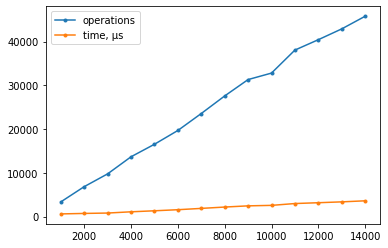

In [5]:
from matplotlib import pyplot as plt

lengths, operations, el_time = zip(*av_operations_used)

plt.plot(lengths, operations, marker = '.', label = 'operations')
plt.plot(lengths, el_time, marker = '.', label = 'time, μs')
plt.legend()